<a href="https://colab.research.google.com/github/anthony-illenden/mea705/blob/main/Viscous_jet_decay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Figure Size (Default is too small)
plt.rcParams["figure.figsize"] = (15, 9)

**Viscous decay of a jet**

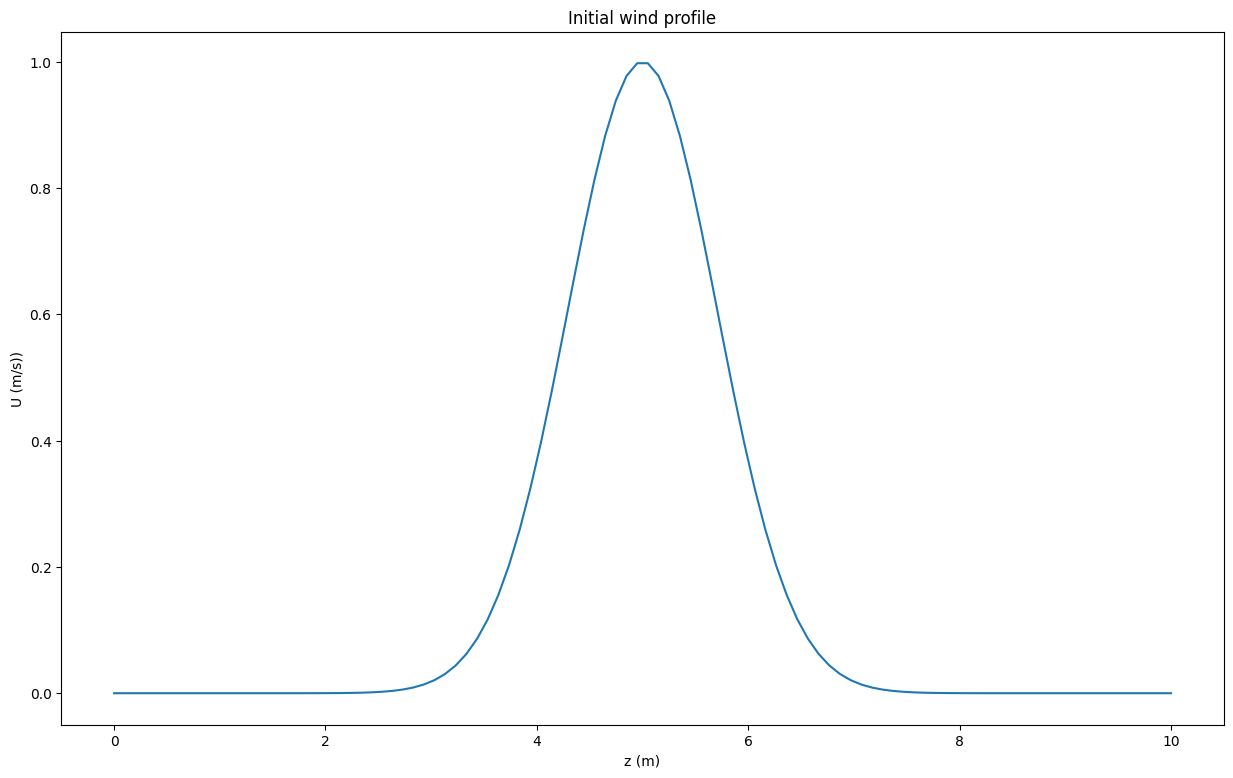

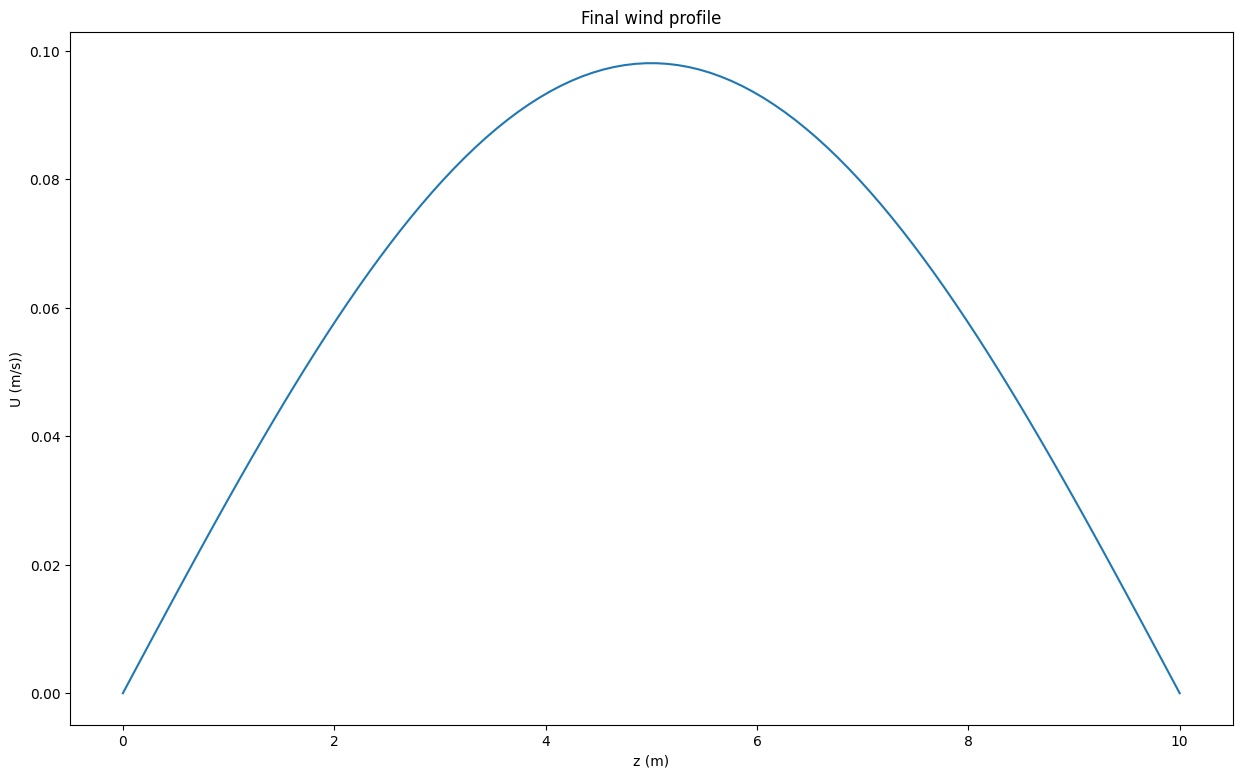

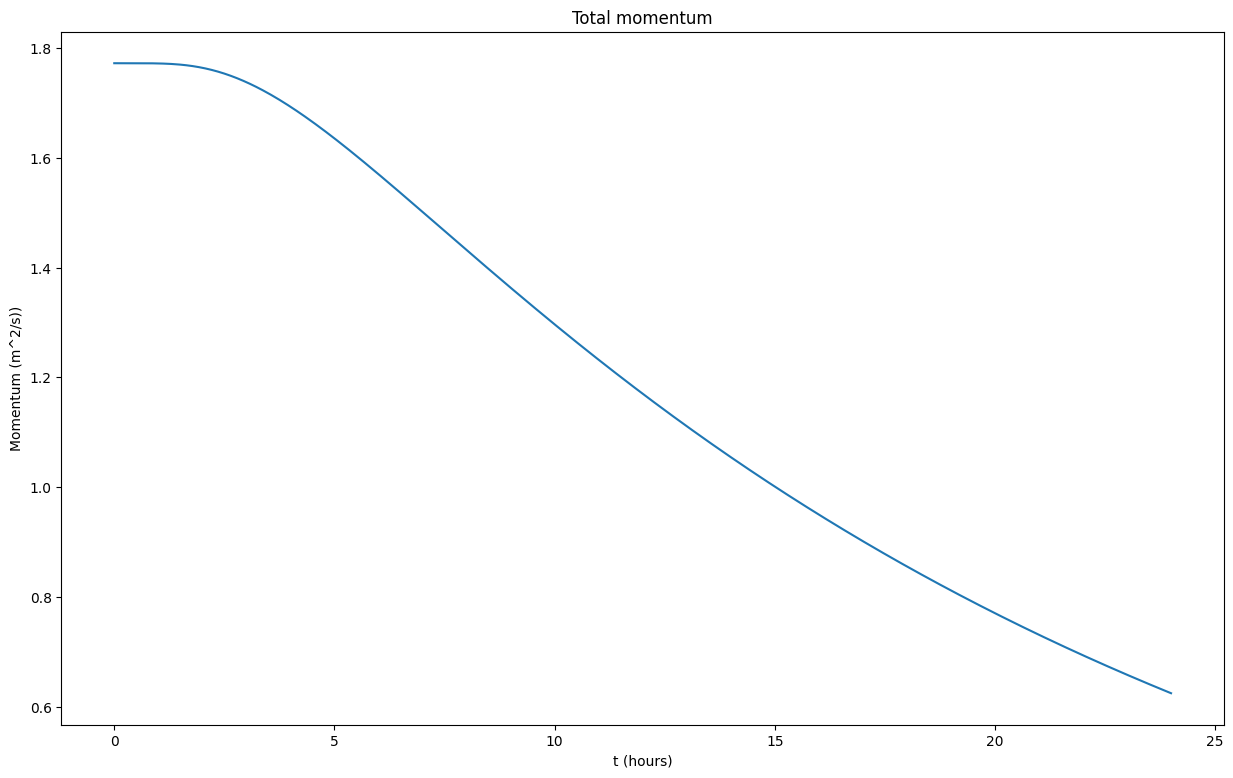

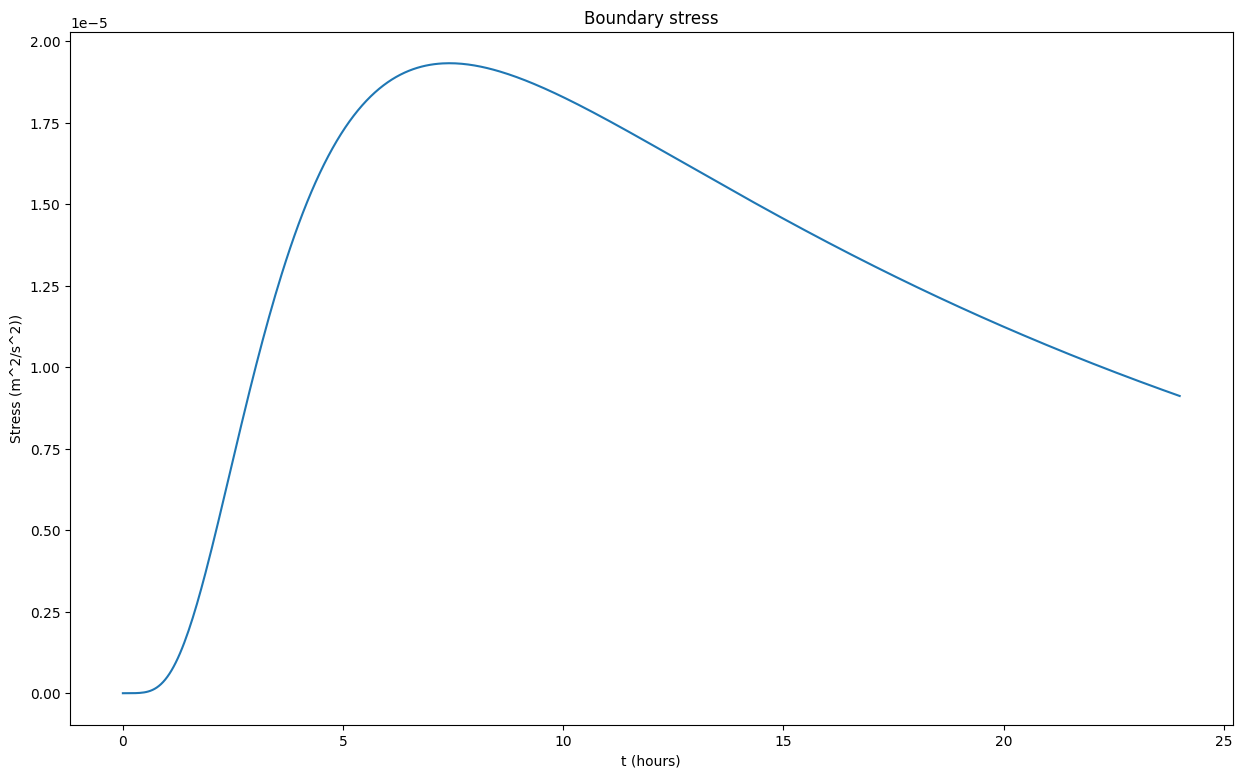

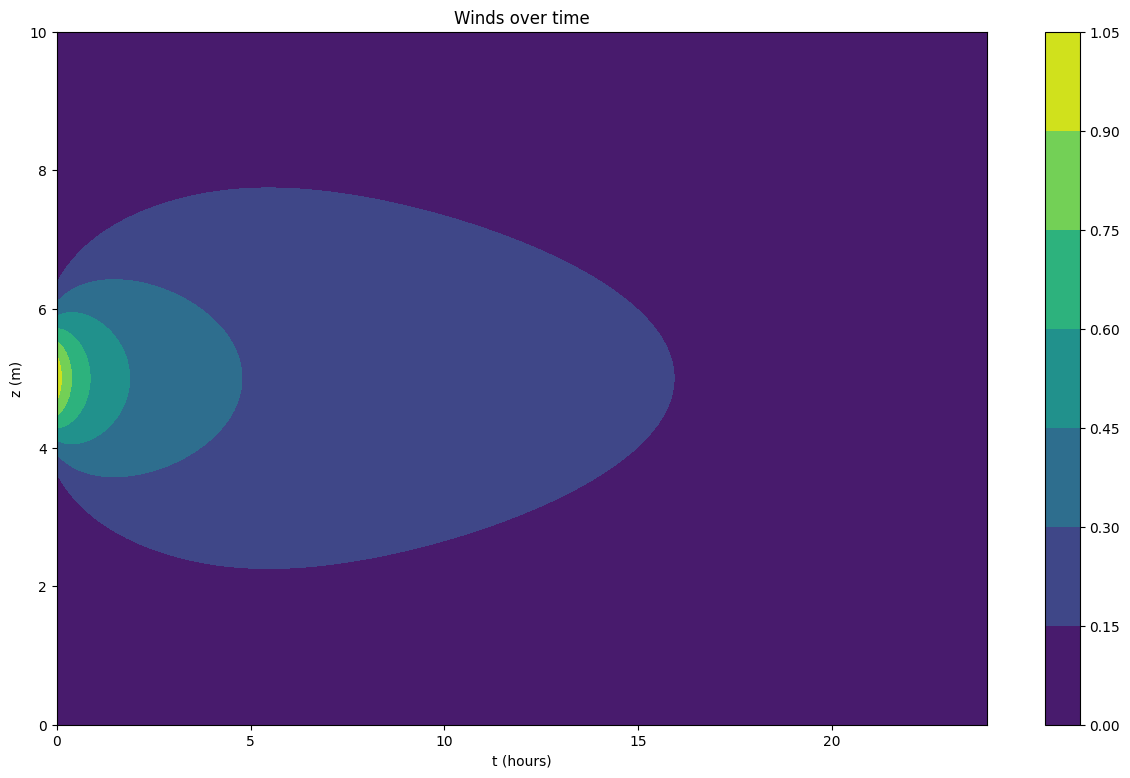

In [ ]:

# Tri Diagonal Matrix Algorithm(a.k.a Thomas algorithm) solver
def TDMAsolver(a, b, c, d):

    nf = len(a)     # number of equations

    ac, bc, cc, dc = map(np.array, (a, b, c, d))     # copy the array
    for it in range(1, nf):
        mc = ac[it]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1]
        dc[it] = dc[it] - mc*dc[it-1]

    xc = ac
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    del bc, cc, dc  # delete variables from memory

    return xc


# Define vertical grid
n=100 #number of points
z_max=10. #maximum height: m
delta_z=z_max/(n-1)
z=np.linspace(0.,z_max,n) #z values: m

# Define times
n_t=500
t_max= 86400 #duration of run: s
t=np.linspace(0.,t_max,n_t) #time values: s
t_hours=t/3600.
delta_t=t_max/(n_t-1.)

# U array in z & t
U_t=np.zeros((n,n_t))

nu=1.48e-4 #kinematic viscosity of dry air: m^2/s

# Initial U profile, a Gaussian with width w
U_max=1. #maximum wind: m/s
w=1. #width of Gaussian profile: m
z_0=z_max/2 #center of profile: m
U_t[:,0]=U_max*np.exp(-(z-z_0)**2/w**2)

# Loop over time - fully implicit
# Define matrix elements for tridiagonal solver
a=np.zeros(n)
b=np.zeros(n)
c=np.zeros(n)

# Boundary elements
a[0]=0.
a[n-1]=0.
b[0]=1.
b[n-1]=1.
c[0]=0.
c[n-1]=0.

# Interior elements
param = delta_t*nu/delta_z**2
for i_z in range (1,n-1):
  a[i_z]= -param
  b[i_z]= 1.+2.*param
  c[i_z]= -param

for i_t in range (1,n_t):
  U_t[:,i_t]=TDMAsolver(a, b, c,U_t[:,i_t-1])

#Total momentum quantities
Mom=np.zeros(n_t) #integrated momentum: m^2/s
Stress=np.zeros(n_t) #shear stress at boundaries

# Diagnose total momentum
for i_t in range (0,n_t):
  Mom[i_t]=sum(U_t[:,i_t])*delta_z #total momentum: m^2/s
  #Total shear stress at boundaries
  Stress[i_t] = nu/delta_z*(U_t[1,i_t]-U_t[0,i_t]+U_t[n-2,i_t]-U_t[n-1,i_t])

#Plots
#Initial and final wind profiles
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('U (m/s))')
ax1.set_xlabel('z (m)')
ax1.set_title('Initial wind profile')
line, = ax1.plot(z,U_t[:,0])
plt.show()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('U (m/s))')
ax1.set_xlabel('z (m)')
ax1.set_title('Final wind profile')
line, = ax1.plot(z,U_t[:,n_t-1])

#Total momentum and shear stress
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Momentum (m^2/s))')
ax1.set_xlabel('t (hours)')
ax1.set_title('Total momentum')
line, = ax1.plot(t_hours,Mom)
plt.show()
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.set_ylabel('Stress (m^2/s^2))')
ax1.set_xlabel('t (hours)')
ax1.set_title('Boundary stress')
line, = ax1.plot(t_hours,Stress)
plt.show()

# Contour plot of winds over time
fig, ax = plt.subplots()
CS = ax.contourf(t_hours, z, U_t)
cbar = plt.colorbar(CS)
ax.set_title('Winds over time');
ax.set_ylabel('z (m)');
ax.set_xlabel('t (hours)');